In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold, learning_curve,  cross_val_score, RandomizedSearchCV, train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression 
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
# from sklearn.preprocessing import KBinsDiscretizer
# from sklearn.covariance import EllipticEnvelope
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb

from sklearn.metrics import classification_report, accuracy_score, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.preprocessing import StandardScaler, RobustScaler

In [8]:
df = pd.read_csv('cicds_data_low.csv')

In [9]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26395,53,31957,4,2,144,136,36,36,36.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
26396,443,10,2,0,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
26397,389,105762643,22,13,2986,6356,1305,0,135.727273,379.293351,...,32,139398.0,0.0,139398,139398,106000000.0,0.0,106000000,106000000,0
26398,53,48436,2,2,96,438,48,48,48.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0


In [10]:
df.Label.value_counts()

0    26393
1        7
Name: Label, dtype: int64

In [11]:
df.isnull().sum().sum()

3

In [12]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [13]:
df.columns= ['Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets',
       'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
       'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_Bytes', 'Flow_Packets',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',
       'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length',
       'Bwd_Header_Length', 'Fwd_Packets', 'Bwd_Packets',
       'Min_Packet_Length', 'Max_Packet_Length', 'Packet_Length_Mean',
       'Packet_Length_Std', 'Packet_Length_Variance', 'FIN_Flag_Count',
       'SYN_Flag_Count', 'RST_Flag_Count', 'PSH_Flag_Count', 'ACK_Flag_Count',
       'URG_Flag_Count', 'CWE_Flag_Count', 'ECE_Flag_Count', 'Down_Up_Ratio',
       'Average_Packet_Size', 'Avg_Fwd_Segment_Size', 'Avg_Bwd_Segment_Size',
       'Fwd_Header_Length', 'Fwd_Avg_Bytes', 'Fwd_Avg_Packets',
       'Fwd_Avg_Bulk_Rate', 'Bwd_Avg_Bytes', 'Bwd_Avg_Packets',
       'Bwd_Avg_Bulk_Rate', 'Subflow_Fwd_Packets', 'Subflow_Fwd_Bytes',
       'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Active_Mean', 'Active_Std', 'Active_Max', 'Active_Min', 'Idle_Mean',
       'Idle_Std', 'Idle_Max', 'Idle_Min', 'Label']

In [14]:
df.shape

(26400, 79)

<AxesSubplot:>

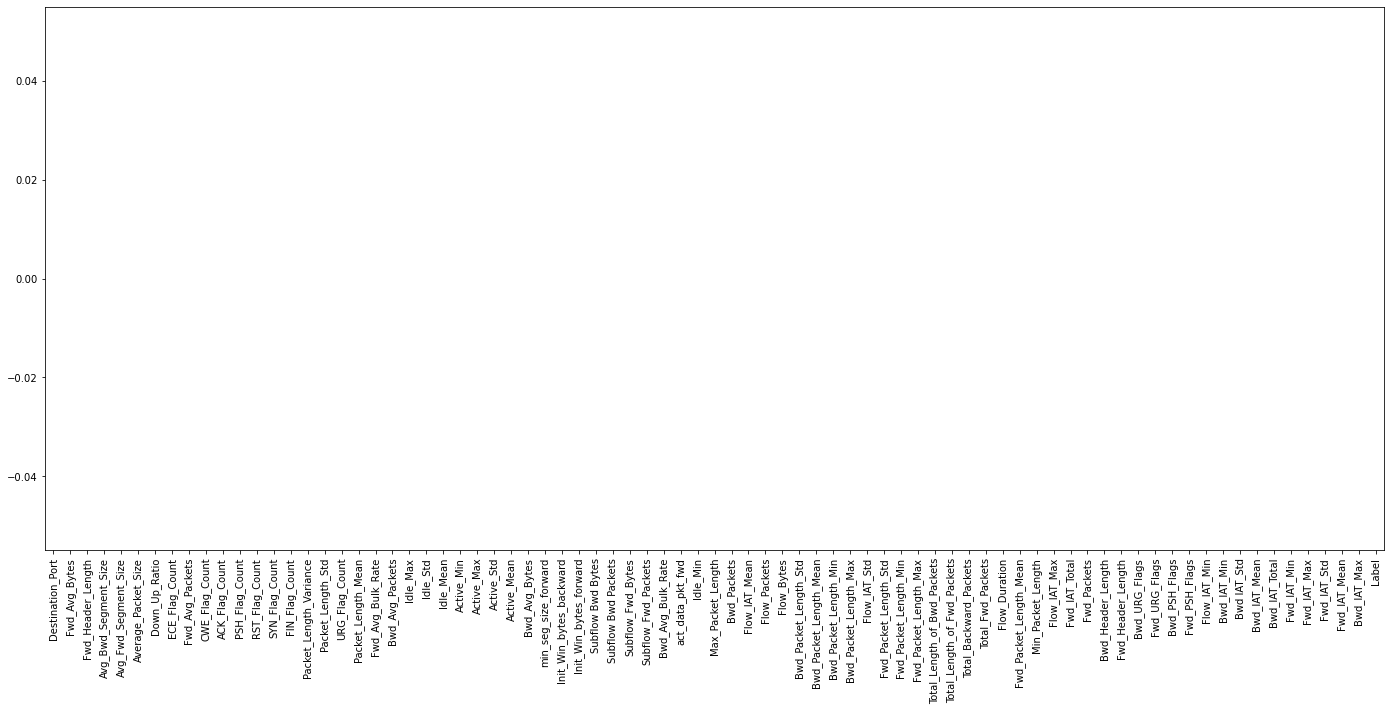

In [11]:
plt.figure(figsize=(24,10))
np.round(df.isnull().sum()/df.shape[0]*100).sort_values().plot(kind='bar')

In [13]:
# # Changing option to use infinite as nan
# pd.set_option('mode.use_inf_as_na', True)

# # Dropping all the rows with nan values
# df.dropna(inplace=True)
  
# # Printing df
# df

In [15]:
df.replace([np.inf,-np.inf], np.nan, inplace = True)

In [16]:
df.dropna(inplace = True)

In [17]:
df.reset_index(inplace = True)

In [18]:
# sns.heatmap(df.iloc[:,0:5].isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
# df.info()

In [20]:
df['Label']

0        0
1        0
2        0
3        0
4        0
        ..
26387    0
26388    0
26389    0
26390    0
26391    0
Name: Label, Length: 26392, dtype: int64

In [21]:
features = df.drop(['Label'], axis = 1)
target = df['Label']

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(features)
scaled_features = scaler.transform(features)

In [23]:
df_scaled_features = pd.DataFrame(scaled_features, columns = features.columns)
df_scaled_features

,index,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,...,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,0.000000,0.000342,1.055287e-02,0.022247,0.015759,0.011466,0.001370,0.032737,0.000000,0.019038,...,0.013348,0.727273,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,0.000038,0.000342,1.099463e-02,0.022247,0.015759,0.011466,0.001370,0.032737,0.000000,0.019038,...,0.013348,0.727273,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,0.000076,0.000342,1.325003e-06,0.000000,0.000358,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.727273,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,0.000114,0.000342,1.086242e-02,0.022247,0.015043,0.011741,0.001307,0.032737,0.000000,0.019495,...,0.013348,0.727273,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,0.000152,0.550885,6.333348e-07,0.000000,0.000716,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.727273,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26387,0.999848,0.000825,2.663006e-04,0.001669,0.000716,0.000620,0.000027,0.002585,0.024457,0.010548,...,0.001669,0.454545,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
26388,0.999886,0.006895,7.500018e-08,0.000556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.727273,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
26389,0.999924,0.006054,8.813574e-01,0.011680,0.004656,0.012851,0.001253,0.093689,0.000000,0.039768,...,0.005562,0.727273,0.008712,0.0,0.005403,0.010641,0.890756,0.0,0.890756,0.890756
26390,0.999962,0.000825,4.036260e-04,0.000556,0.000716,0.000413,0.000086,0.003446,0.032609,0.014064,...,0.000556,0.727273,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [24]:
new_dataset = pd.concat([df_scaled_features,target], axis = 1)

In [25]:
new_dataset.drop(['index'], axis = 1, inplace = True)

In [26]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26392 entries, 0 to 26391
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Destination_Port             26392 non-null  float64
 1   Flow_Duration                26392 non-null  float64
 2   Total_Fwd_Packets            26392 non-null  float64
 3   Total_Backward_Packets       26392 non-null  float64
 4   Total_Length_of_Fwd_Packets  26392 non-null  float64
 5   Total_Length_of_Bwd_Packets  26392 non-null  float64
 6   Fwd_Packet_Length_Max        26392 non-null  float64
 7   Fwd_Packet_Length_Min        26392 non-null  float64
 8   Fwd_Packet_Length_Mean       26392 non-null  float64
 9   Fwd_Packet_Length_Std        26392 non-null  float64
 10  Bwd_Packet_Length_Max        26392 non-null  float64
 11  Bwd_Packet_Length_Min        26392 non-null  float64
 12  Bwd_Packet_Length_Mean       26392 non-null  float64
 13  Bwd_Packet_Lengt

In [27]:
new = new_dataset.to_csv(r'preprocessed_dataset2.csv', encoding = 'utf-8', index = False)

In [28]:
df = pd.read_csv("preprocessed_dataset2.csv")

In [29]:
features = df.drop('Label', axis = 1)
target = df['Label']

In [30]:
target

0        0
1        0
2        0
3        0
4        0
        ..
26387    0
26388    0
26389    0
26390    0
26391    0
Name: Label, Length: 26392, dtype: int64

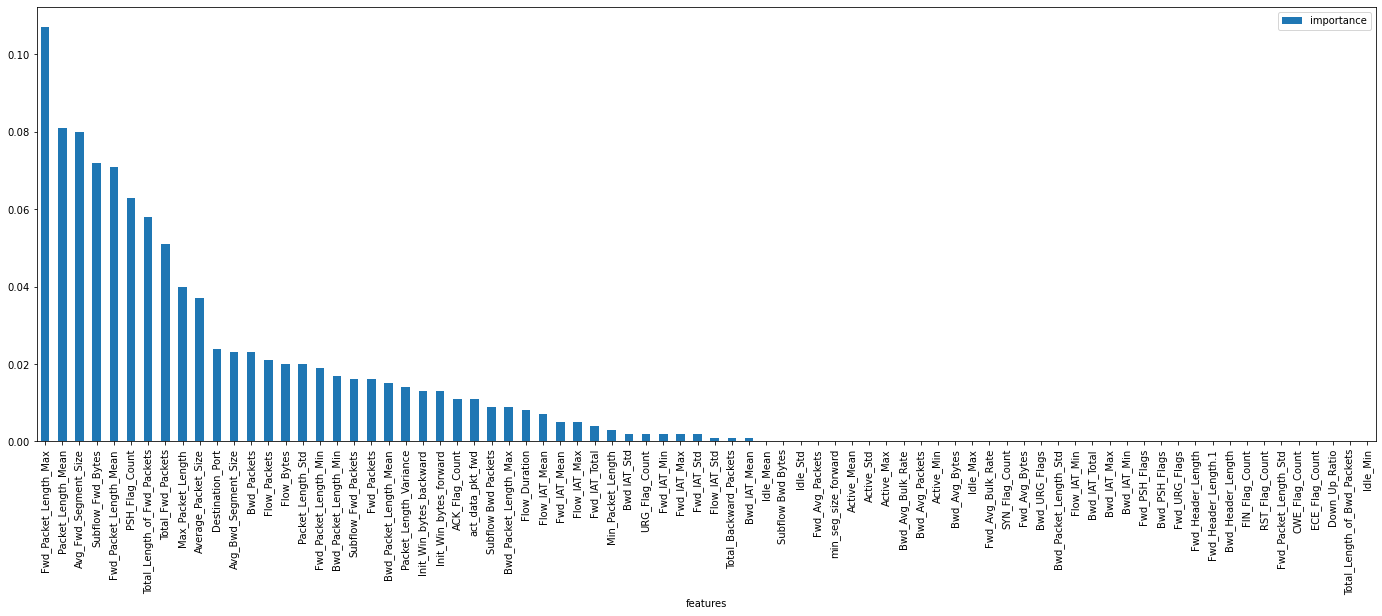

In [7]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(features, target);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'features':features.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('features')
# plot importances
plt.rcParams['figure.figsize'] = (24, 8)
importances.plot.bar();

In [38]:
results_test = {}
results_train = {}
list_algos=[]

def predict(algo_name,X_train,y_train,X_test,y_test, atype='',verbose=0):
    algo_name.fit(X_train, y_train)
    Y_pred = algo_name.predict(X_test)
    acc_train = round(algo_name.score(X_train, y_train) * 100, 2)
    acc_val = round(algo_name.score(X_test, y_test) * 100, 2)
    
    results_test[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_val
    results_train[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_train
    list_algos.append(str(algo_name)[0:str(algo_name).find('(')])
    if verbose ==0:
        print("Training Accuracy: " + str(acc_train))
        print("Testing  Accuracy: "+ str(acc_val))
    else:
        return Y_pred

In [24]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((21113, 79), (21113,))

In [12]:
#RF

rf = RandomForestClassifier(n_estimators=250, random_state = 42)
predict(rf,X_train,y_train,X_test,y_test)
print(classification_report(y_test, rf.predict(X_test)))

Training Accuracy: 100.0
Testing  Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17973
           1       1.00      1.00      1.00     23277

    accuracy                           1.00     41250
   macro avg       1.00      1.00      1.00     41250
weighted avg       1.00      1.00      1.00     41250



In [26]:
#LR

lr = LogisticRegression(solver='lbfgs')
predict(lr,X_train,y_train,X_test,y_test)
print(classification_report(y_test, lr.predict(X_test)))

Training Accuracy: 99.99
Testing  Accuracy: 99.96
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5278
           1       0.00      0.00      0.00         1

    accuracy                           1.00      5279
   macro avg       0.50      0.50      0.50      5279
weighted avg       1.00      1.00      1.00      5279



C:\Users\moinu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
# GBC

gbc = GradientBoostingClassifier()
predict(gbc,X_train,y_train,X_test,y_test)
print(classification_report(y_test, gbc.predict(X_test)))

Training Accuracy: 99.99
Testing  Accuracy: 99.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17973
           1       1.00      1.00      1.00     23277

    accuracy                           1.00     41250
   macro avg       1.00      1.00      1.00     41250
weighted avg       1.00      1.00      1.00     41250



In [15]:
# ADA

ada = AdaBoostClassifier()
predict(ada,X_train,y_train,X_test,y_test)
print(classification_report(y_test, ada.predict(X_test)))

Training Accuracy: 100.0
Testing  Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17973
           1       1.00      1.00      1.00     23277

    accuracy                           1.00     41250
   macro avg       1.00      1.00      1.00     41250
weighted avg       1.00      1.00      1.00     41250



In [16]:
# DT

dt = DecisionTreeClassifier()
predict(dt,X_train,y_train,X_test,y_test)
print(classification_report(y_test, dt.predict(X_test)))

Training Accuracy: 100.0
Testing  Accuracy: 99.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17973
           1       1.00      1.00      1.00     23277

    accuracy                           1.00     41250
   macro avg       1.00      1.00      1.00     41250
weighted avg       1.00      1.00      1.00     41250



In [29]:
#GaussianNB

nb = GaussianNB()
predict(nb,X_train,y_train,X_test,y_test)
print(classification_report(y_test, nb.predict(X_test)))

Training Accuracy: 89.26
Testing  Accuracy: 89.01
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      5278
           1       0.00      0.00      0.00         1

    accuracy                           0.89      5279
   macro avg       0.50      0.45      0.47      5279
weighted avg       1.00      0.89      0.94      5279



In [18]:
#xgb

xg = xgb.XGBClassifier()
predict(xg,X_train,y_train,X_test,y_test)
print(classification_report(y_test, xg.predict(X_test)))

C:\Users\moinu\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:43:03] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\moinu\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\moinu\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Training Accuracy: 100.0
Testing  Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17973
           1       1.00      1.00      1.00     23277

    accuracy                           1.00     41250
   macro avg       1.00      1.00      1.00     41250
weighted avg       1.00      1.00      1.00     41250



C:\Users\moinu\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [30]:
#svc

svc = SVC(kernel='linear', probability=True)
predict(svc,X_train,y_train,X_test,y_test)
print(classification_report(y_test, svc.predict(X_test)))

Training Accuracy: 100.0
Testing  Accuracy: 99.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5278
           1       0.00      0.00      0.00         1

    accuracy                           1.00      5279
   macro avg       0.50      0.50      0.50      5279
weighted avg       1.00      1.00      1.00      5279



C:\Users\moinu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\moinu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\moinu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
#MLP

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)  
predict(mlp,X_train,y_train,X_test,y_test)
print(classification_report(y_test, mlp.predict(X_test)))

Training Accuracy: 99.97
Testing  Accuracy: 99.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5278
           1       0.00      0.00      0.00         1

    accuracy                           1.00      5279
   macro avg       0.50      0.50      0.50      5279
weighted avg       1.00      1.00      1.00      5279



C:\Users\moinu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\moinu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\moinu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SMOTE

In [31]:
from imblearn.over_sampling import SMOTE

X, y = SMOTE(random_state=42).fit_resample(features, target)

In [32]:
from collections import Counter
print(sorted(Counter(y).items()))

[(0, 26385), (1, 26385)]


In [33]:
X_train_s,X_test,y_train_s,y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [34]:
rfc = RandomForestClassifier(n_estimators=100,random_state = 42)

In [39]:
# KNN

knneig = KNeighborsClassifier(n_neighbors=100)
knneig.fit(X_train_s, y_train_s)
# pred_knneigh = knneig.predict(X_test1)
# score_knneigh_before = accuracy_score(y_test, pred_knneigh)
# print(score_knneigh_before)
predict(knneig,X_train_s,y_train_s,X_test,y_test)
print(classification_report(y_test, knneig.predict(X_test)))

Training Accuracy: 99.63
Testing  Accuracy: 99.72
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5366
           1       0.99      1.00      1.00      5188

    accuracy                           1.00     10554
   macro avg       1.00      1.00      1.00     10554
weighted avg       1.00      1.00      1.00     10554



In [35]:
lr = LogisticRegression()
lr.fit(X_train_s,y_train_s)
predictions = lr.predict(X_test)
predict(knneig,X_train_s,y_train_s,X_test,y_test)
print(classification_report(y_test,predictions))

0.985882129998105
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      5366
           1       0.97      1.00      0.99      5188

    accuracy                           0.99     10554
   macro avg       0.99      0.99      0.99     10554
weighted avg       0.99      0.99      0.99     10554



In [40]:
#GaussianNB

nb = GaussianNB()
nb.fit(X_train_s,y_train_s)
predictions = nb.predict(X_test)
predict(knneig,X_train_s,y_train_s,X_test,y_test)
print(classification_report(y_test,predictions))

0.990145916240288
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5366
           1       0.98      1.00      0.99      5188

    accuracy                           0.99     10554
   macro avg       0.99      0.99      0.99     10554
weighted avg       0.99      0.99      0.99     10554



In [41]:
#MLP

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train_s,y_train_s)
predictions = mlp.predict(X_test)
predict(knneig,X_train_s,y_train_s,X_test,y_test)
print(classification_report(y_test,predictions))

0.9989577411407997
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5366
           1       1.00      1.00      1.00      5188

    accuracy                           1.00     10554
   macro avg       1.00      1.00      1.00     10554
weighted avg       1.00      1.00      1.00     10554



In [42]:
#svc

svc = SVC(kernel='linear', probability=True)
svc.fit(X_train_s,y_train_s)
predictions = svc.predict(X_test)
predict(knneig,X_train_s,y_train_s,X_test,y_test)
print(classification_report(y_test,predictions))

0.9915671783210157
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5366
           1       0.98      1.00      0.99      5188

    accuracy                           0.99     10554
   macro avg       0.99      0.99      0.99     10554
weighted avg       0.99      0.99      0.99     10554



In [43]:
r_probs = [0 for _ in range(len(y_test))]
KNN_probs = knneig.predict_proba(X_test)
LR_probs = lr.predict_proba(X_test)
svc_probs = svc.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)
mlp_probs = mlp.predict_proba(X_test)


KNN_probs = KNN_probs[:, 1]
LR_probs = LR_probs[:, 1]
svc_probs = svc_probs[:, 1]
nb_probs = nb_probs[:, 1]
mlp_probs = mlp_probs[:, 1]


r_auc = roc_auc_score(y_test, r_probs)
KNN_auc = roc_auc_score(y_test, KNN_probs)
LR_auc = roc_auc_score(y_test, LR_probs)
svc_auc = roc_auc_score(y_test, svc_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
mlp_auc = roc_auc_score(y_test, mlp_probs)

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
KNN_fpr, KNN_tpr, _ = roc_curve(y_test, KNN_probs)
LR_fpr, LR_tpr, _ = roc_curve(y_test, LR_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_probs)

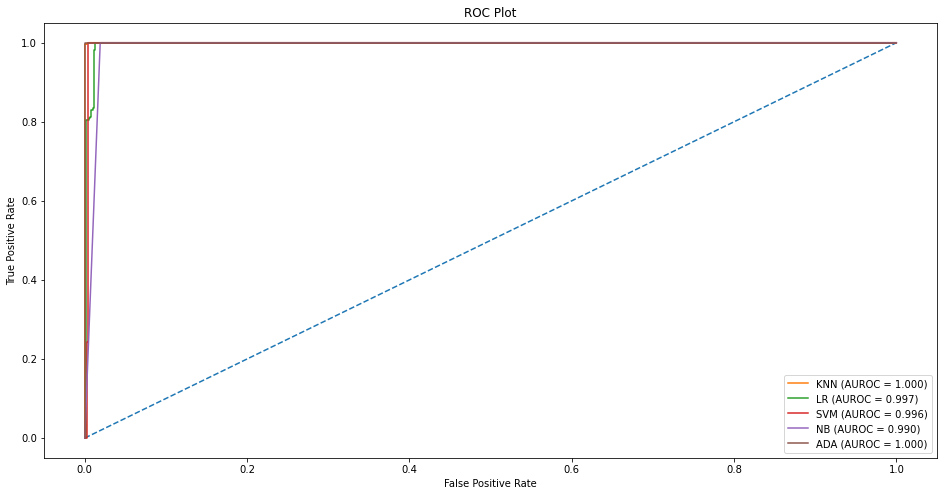

In [44]:
plt.figure(figsize=(16,8))
plt.plot(r_fpr, r_tpr, linestyle='--')
#plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(KNN_fpr, KNN_tpr, label='KNN (AUROC = %0.3f)' % KNN_auc)
plt.plot(LR_fpr, LR_tpr, label='LR (AUROC = %0.3f)' % LR_auc)
plt.plot(svc_fpr, svc_tpr, label='SVM (AUROC = %0.3f)' % svc_auc)
plt.plot(nb_fpr, nb_tpr, label='NB (AUROC = %0.3f)' % nb_auc)
plt.plot(mlp_fpr, mlp_tpr, label='ADA (AUROC = %0.3f)' % mlp_auc)



# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## RFE

In [33]:
from sklearn.feature_selection import RFE
import itertools

# create the RFE model and select 10 attributes
rfc = RandomForestClassifier(n_estimators=250, random_state = 42)
rfe = RFE(rfc, n_features_to_select=25)
rfe = rfe.fit(X, y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['Destination_Port',
 'Flow_Duration',
 'Total_Fwd_Packets',
 'Total_Backward_Packets',
 'Fwd_Packet_Length_Max',
 'Fwd_Packet_Length_Min',
 'Bwd_Packet_Length_Min',
 'Flow_IAT_Max',
 'Fwd_IAT_Min',
 'Bwd_IAT_Mean',
 'Bwd IAT_Std',
 'Bwd_IAT_Max',
 'Bwd_Header_Length',
 'Bwd_Packets',
 'Min_Packet_Length',
 'Max_Packet_Length',
 'PSH_Flag_Count',
 'URG_Flag_Count',
 'Average_Packet_Size',
 'Subflow_Fwd_Packets',
 'Subflow Bwd Packets',
 'Init_Win_bytes_forward',
 'Init_Win_bytes_backward',
 'act_data_pkt_fwd',
 'min_seg_size_forward']

In [34]:
X_rfe = X.iloc[:, rfe.support_]

print("\"X\" dimension: {}".format(X.shape))
print("\"X\" column list:", X.columns.tolist())
print("\"X_rfe\" dimension: {}".format(X_rfe.shape))
print("\"X_rfe\" column list:", X_rfe.columns.tolist())

"X" dimension: (52770, 78)
"X" column list: ['Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets', 'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets', 'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max', 'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean', 'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max', 'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean', 'Bwd_Packet_Length_Std', 'Flow_Bytes', 'Flow_Packets', 'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length', 'Bwd_Header_Length', 'Fwd_Packets', 'Bwd_Packets', 'Min_Packet_Length', 'Max_Packet_Length', 'Packet_Length_Mean', 'Packet_Length_Std', 'Packet_Length_Variance', 'FIN_Flag_Count', 'SYN_Flag_Count', 'RST_Flag_Count', 'PSH_Flag_Count', 'ACK_Flag_Count', 'URG_Flag_Count

In [35]:
col = X.columns
col = list(col)

col.append('label')
col

['Destination_Port',
 'Flow_Duration',
 'Total_Fwd_Packets',
 'Total_Backward_Packets',
 'Total_Length_of_Fwd_Packets',
 'Total_Length_of_Bwd_Packets',
 'Fwd_Packet_Length_Max',
 'Fwd_Packet_Length_Min',
 'Fwd_Packet_Length_Mean',
 'Fwd_Packet_Length_Std',
 'Bwd_Packet_Length_Max',
 'Bwd_Packet_Length_Min',
 'Bwd_Packet_Length_Mean',
 'Bwd_Packet_Length_Std',
 'Flow_Bytes',
 'Flow_Packets',
 'Flow_IAT_Mean',
 'Flow_IAT_Std',
 'Flow_IAT_Max',
 'Flow_IAT_Min',
 'Fwd_IAT_Total',
 'Fwd_IAT_Mean',
 'Fwd_IAT_Std',
 'Fwd_IAT_Max',
 'Fwd_IAT_Min',
 'Bwd_IAT_Total',
 'Bwd_IAT_Mean',
 'Bwd IAT_Std',
 'Bwd_IAT_Max',
 'Bwd_IAT_Min',
 'Fwd_PSH_Flags',
 'Bwd_PSH_Flags',
 'Fwd_URG_Flags',
 'Bwd_URG_Flags',
 'Fwd_Header_Length',
 'Bwd_Header_Length',
 'Fwd_Packets',
 'Bwd_Packets',
 'Min_Packet_Length',
 'Max_Packet_Length',
 'Packet_Length_Mean',
 'Packet_Length_Std',
 'Packet_Length_Variance',
 'FIN_Flag_Count',
 'SYN_Flag_Count',
 'RST_Flag_Count',
 'PSH_Flag_Count',
 'ACK_Flag_Count',
 'URG_Flag_C

In [36]:
df = pd.concat([X, y], axis=1)
df

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,0.000342,1.055287e-02,0.022247,0.015759,0.011466,0.001370,0.032737,0.0,0.019038,0.031022,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.000342,1.099463e-02,0.022247,0.015759,0.011466,0.001370,0.032737,0.0,0.019038,0.031022,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.000342,1.325003e-06,0.000000,0.000358,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.000342,1.086242e-02,0.022247,0.015043,0.011741,0.001307,0.032737,0.0,0.019495,0.031097,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.550885,6.333348e-07,0.000000,0.000716,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52765,0.001245,6.269024e-03,0.000417,0.000573,0.000453,0.000042,0.003829,0.0,0.005143,0.007680,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
52766,0.001245,7.992727e-07,0.000000,0.000358,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
52767,0.001245,3.235632e-03,0.000215,0.000469,0.000234,0.000022,0.001976,0.0,0.002654,0.003963,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
52768,0.001245,1.341274e-03,0.000089,0.000404,0.000097,0.000009,0.000819,0.0,0.001100,0.001642,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [37]:
df.to_csv('cicids_balanced2.csv')

In [3]:
df = pd.read_csv("cicids_balanced2.csv", index_col=0)

In [4]:
features = df.drop('Label', axis = 1)

In [5]:
features = features[['Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets', 'Total_Backward_Packets', 'Fwd_Packet_Length_Max', 'Fwd_Packet_Length_Min', 'Bwd_Packet_Length_Min', 'Flow_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Mean', 'Bwd IAT_Std', 'Bwd_IAT_Max', 'Bwd_Header_Length', 'Bwd_Packets', 'Min_Packet_Length', 'Max_Packet_Length', 'PSH_Flag_Count', 'URG_Flag_Count', 'Average_Packet_Size', 'Subflow_Fwd_Packets', 'Subflow Bwd Packets', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward']]

## Isolation Forest

In [78]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples='auto', \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(features)

IsolationForest(n_jobs=-1, random_state=42)

In [79]:
pred = clf.predict(features)
features['anomaly']=pred
outliers=features.loc[features['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(features['anomaly'].value_counts())

 1    48458
-1     4312
Name: anomaly, dtype: int64


In [80]:
outlier_label = []
outlier_label = list(pred)

print(outlier_label.count(-1))

4312


In [81]:
c = 0
end = 52770
for i in range(0,end):
    if df['Label'][i] == 'anomaly' and outlier_label[i] == -1:
        c += 1
    
print(c)

0


In [82]:
q = 0
while q < len(outlier_label):
    if outlier_label[q] == -1:
        #print(q)
        df.drop(q,axis=0,inplace =True)
    q+=1

In [83]:
df.to_csv(r'cicds_isolation2.csv',encoding='utf-8',index=False)

Text(0, 0.5, 'Flow_Duration')

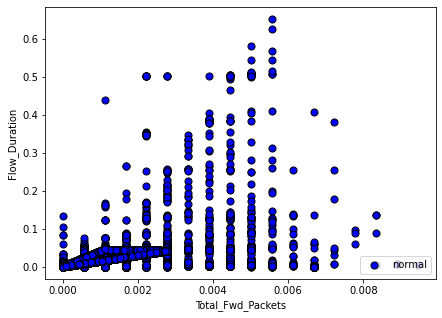

In [88]:
outlier_label = np.array(outlier_label)
#print(outlier_label)
outlier_label = outlier_label.reshape(1,52770)
plt.figure(figsize=(7,5))
# plt.scatter(features[outlier_label[0] == -1].Total_Fwd_Packets,
#             features[outlier_label[0] == -1].Flow_Duration,
#             s=50,
#             c='red',
#             marker='o',
#             edgecolors= 'black',
#            label = 'anomaly')

plt.scatter(features[outlier_label[0] == 1].Total_Fwd_Packets,
            features[outlier_label[0] == 1].Flow_Duration,
            s=50,
            c='blue',
            marker='o',
            edgecolors= 'black',
            label='normal')

plt.legend(loc = 'lower right')
plt.xlabel('Total_Fwd_Packets')
plt.ylabel('Flow_Duration')

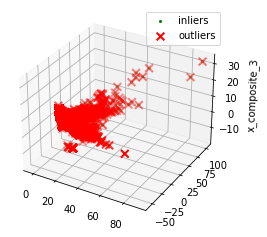

In [35]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(features)
X_reduce = pca.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")

# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")

# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

## DBScan

In [42]:
df = pd.read_csv("cicids_balanced2.csv", index_col=0)

In [43]:
features = df.drop('Label', axis = 1)

In [44]:
# features = features[['Flow_Duration', 'Total_Fwd_Packets', 'Total_Length_of_Fwd_Packets', 'Fwd_Packet_Length_Max', 'Fwd_Packet_Length_Mean', 'Bwd_Packet_Length_Max', 'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean', 'Flow_Bytes', 'Flow_Packets', 'Flow_IAT_Mean', 'Flow_IAT_Max', 'Bwd_Packets', 'Max_Packet_Length', 'Packet_Length_Mean', 'Packet_Length_Std', 'Packet_Length_Variance', 'PSH_Flag_Count', 'ACK_Flag_Count', 'Average_Packet_Size', 'Avg_Fwd_Segment_Size', 'Avg_Bwd_Segment_Size', 'Subflow_Fwd_Packets', 'Subflow_Fwd_Bytes', 'Init_Win_bytes_forward']]

In [45]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2,algorithm = 'ball_tree')
nbrs = neigh.fit(features)

distances, indices = nbrs.kneighbors(features)

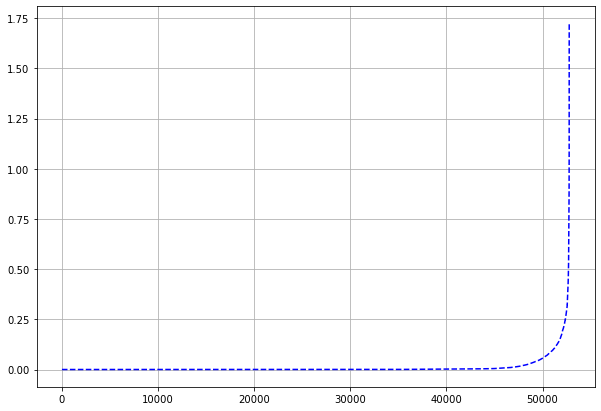

In [46]:
distances = np.sort(distances,axis = 0)
distances = distances[:,1]
plt.figure(figsize = (10,7))
plt.plot(distances,color='blue', linestyle='dashed')
plt.grid()

In [47]:
features.shape

(52770, 78)

In [48]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.15,min_samples = 100)

model = dbscan.fit(features)

In [49]:
outlier_label = model.labels_
print(outlier_label)

[-1 -1  0 ...  0  0  0]


In [50]:
count = 0
for i in outlier_label:
    if i == -1:
        count = count + 1
print(count)

7316


In [51]:
q = 0
while q < len(outlier_label):
    if outlier_label[q] == -1:
        df.drop(q,axis=0,inplace =True)
    q+=1

In [52]:
df.to_csv(r'cicids_dbscan2.csv',encoding='utf-8',index=False)

## KMeans

In [53]:
df = pd.read_csv("cicids_balanced2.csv", index_col=0)

In [54]:
# features = features[['Flow_Duration', 'Total_Fwd_Packets', 'Total_Length_of_Fwd_Packets', 'Fwd_Packet_Length_Max', 'Fwd_Packet_Length_Mean', 'Bwd_Packet_Length_Max', 'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean', 'Flow_Bytes', 'Flow_Packets', 'Flow_IAT_Mean', 'Flow_IAT_Max', 'Bwd_Packets', 'Max_Packet_Length', 'Packet_Length_Mean', 'Packet_Length_Std', 'Packet_Length_Variance', 'PSH_Flag_Count', 'ACK_Flag_Count', 'Average_Packet_Size', 'Avg_Fwd_Segment_Size', 'Avg_Bwd_Segment_Size', 'Subflow_Fwd_Packets', 'Subflow_Fwd_Bytes', 'Init_Win_bytes_forward']]

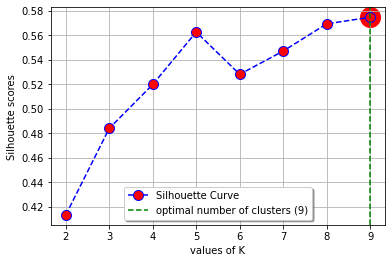

In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans_per_k = [KMeans(n_clusters=k, random_state = 42).fit(features) for k in range(1,10)]
silhouette_score = [silhouette_score(features,model.labels_) for model in kmeans_per_k[1:]]
plt.plot(range(2,10),silhouette_score,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10, label = "Silhouette Curve")
k = np.argmax(silhouette_score) + 2
plt.axvline(x = k, linestyle = '--', c='green', label = "optimal number of clusters ({})".format(k))
plt.scatter(k,silhouette_score[k-2],c = 'red',s=400)
plt.legend(shadow = True)
plt.ylabel("Silhouette scores")
plt.xlabel("values of K")
plt.grid()

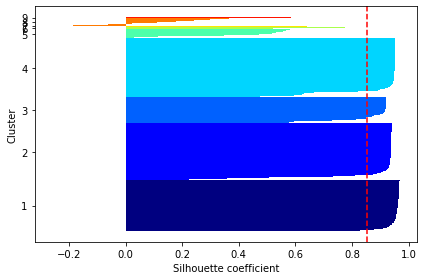

In [51]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=9, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=42)
y_km = km.fit_predict(features)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(features, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

Text(0, 0.5, 'wcss')

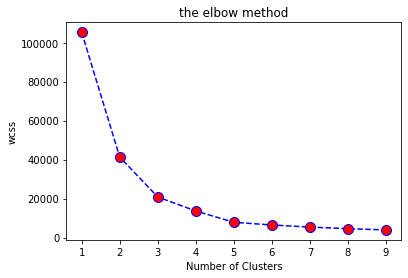

In [52]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')

In [56]:
clustering = KMeans(n_clusters = 9, init = 'k-means++',random_state=42)
clustering.fit(features)

KMeans(n_clusters=9, random_state=42)

In [57]:
cluster_centers = list(clustering.cluster_centers_)

In [58]:
df.shape[0]

52770

In [59]:
from scipy.spatial import distance
from scipy.spatial.distance import cdist 

end = df.shape[0]
distances = []
for i in range(0,end):
    center = list(cluster_centers[clustering.labels_[i]])
    objects = list(features.iloc[i])
    distances.append(distance.euclidean(center,objects))

In [60]:
zero = []
one = []
two = []
three = []
four = []
five = []
six = []
seven = []
eight = []
for i in range(0,end):
    if clustering.labels_[i] == 0:
        zero.append(distances[i])
    elif clustering.labels_[i] == 1:
        one.append(distances[i])
    elif clustering.labels_[i] == 2:
        two.append(distances[i])
    elif clustering.labels_[i] == 3:
        three.append(distances[i])
    elif clustering.labels_[i] == 4:
        four.append(distances[i])
    elif clustering.labels_[i] == 5:
        five.append(distances[i])
    elif clustering.labels_[i] == 6:
        six.append(distances[i])
    elif clustering.labels_[i] == 7:
        seven.append(distances[i])
    else:
        eight.append(distances[i])

In [61]:
zero_mean = np.array(zero).mean()
one_mean = np.array(one).mean()
two_mean = np.array(two).mean()
three_mean = np.array(three).mean()
four_mean = np.array(four).mean()
five_mean = np.array(five).mean()
six_mean = np.array(six).mean()
seven_mean = np.array(seven).mean()
eight_mean = np.array(eight).mean()

In [62]:
outlier_score = []
outlier_score_zero = []
outlier_score_one = []
outlier_score_two = []
outlier_score_three = []
outlier_score_four = []
outlier_score_five = []
outlier_score_six = []
outlier_score_seven = []
outlier_score_eight = []

for i in range(0,end):
    if clustering.labels_[i] == 0:
        outlier_score.append(distances[i]/zero_mean)
        outlier_score_zero.append(distances[i]/zero_mean)
    elif clustering.labels_[i] == 1:
         outlier_score.append(distances[i]/one_mean)
         outlier_score_one.append(distances[i]/one_mean)
    elif clustering.labels_[i] == 2:
         outlier_score.append(distances[i]/two_mean)
         outlier_score_two.append(distances[i]/two_mean)
    elif clustering.labels_[i] == 3:
         outlier_score.append(distances[i]/three_mean)
         outlier_score_three.append(distances[i]/three_mean)
    elif clustering.labels_[i] == 4:
         outlier_score.append(distances[i]/four_mean)
         outlier_score_four.append(distances[i]/four_mean)
    elif clustering.labels_[i] == 5:
         outlier_score.append(distances[i]/five_mean)
         outlier_score_five.append(distances[i]/five_mean)
    elif clustering.labels_[i] == 6:
         outlier_score.append(distances[i]/six_mean)
         outlier_score_six.append(distances[i]/six_mean)
    elif clustering.labels_[i] == 7:
         outlier_score.append(distances[i]/seven_mean)
         outlier_score_seven.append(distances[i]/seven_mean)
    elif clustering.labels_[i] == 8:
         outlier_score.append(distances[i]/eight_mean)
         outlier_score_eight.append(distances[i]/eight_mean)

In [63]:
score_zero = np.array(outlier_score_zero)
score_one = np.array(outlier_score_one)
score_two = np.array(outlier_score_two)
score_three = np.array(outlier_score_three)
score_four = np.array(outlier_score_four)
score_five = np.array(outlier_score_five)
score_six = np.array(outlier_score_six)
score_seven = np.array(outlier_score_seven)
score_eight = np.array(outlier_score_eight)

In [64]:
def boxplot(dist_list):
    sort_score_zero = sorted(dist_list)
    med1 = np.argwhere(sort_score_zero == np.percentile(sort_score_zero,50,interpolation='nearest'))
    med1 = med1[0][0]
    #print(med1)
    firsthalf = sort_score_zero[0:med1+1]
    lasthalf = sort_score_zero[med1+1:]
    firsthalf = np.array(firsthalf)
    lasthalf = np.array(lasthalf)
    q1_index = np.argwhere(firsthalf == np.percentile(firsthalf,50,interpolation='nearest'))
    #print(q1_index)
    q1_index = q1_index[0][0]
    q3_index = np.argwhere(lasthalf == np.percentile(lasthalf,50,interpolation='nearest'))
    q3_index = q3_index[0][0]
    q1 = firsthalf[q1_index]
    q3 = lasthalf[q3_index]
    #print(q1_index)
    #print(q3_index)
    IQR = q3 - q1
    MaxT = q3 + 1.5 * IQR
    MinT = q1 - 1.5 * IQR
    return ((MaxT,MinT))

In [65]:
print(len(score_eight))

1000


In [66]:
MaxT1,MinT1 = boxplot(score_zero)
MaxT2,MinT2 = boxplot(score_one)
MaxT3,MinT3 = boxplot(score_two)
MaxT4,MinT4 = boxplot(score_three)
MaxT5,MinT5 = boxplot(score_four)
MaxT6,MinT6 = boxplot(score_five)
MaxT7,MinT7 = boxplot(score_six)
MaxT8,MinT8 = boxplot(score_seven)
MaxT9,MinT9 = boxplot(score_eight)

In [67]:
outlier_label = []
for i in range(0,end):
    if clustering.labels_[i] == 0:
        if (outlier_score[i] > MaxT1 or outlier_score[i] < MinT1):
            outlier_label.append(0)
        else:
            outlier_label.append(1)
    elif clustering.labels_[i] == 1:
        if (outlier_score[i] > MaxT2 or outlier_score[i] < MinT2):
            outlier_label.append(0)
        else:
            outlier_label.append(2)
    elif clustering.labels_[i] == 2:
        if (outlier_score[i] > MaxT3 or outlier_score[i] < MinT3):
            outlier_label.append(0)
        else:
            outlier_label.append(3)
    elif clustering.labels_[i] == 3:
         if (outlier_score[i] > MaxT4 or outlier_score[i] < MinT4):
            outlier_label.append(0)
         else:
            outlier_label.append(4)
    elif clustering.labels_[i] == 8:
        if (outlier_score[i] > MaxT9 or outlier_score[i] < MinT9):
            outlier_label.append(0)
        else:
            outlier_label.append(9)
    elif clustering.labels_[i] == 5:
        if (outlier_score[i] > MaxT6 or outlier_score[i] < MinT6):
            outlier_label.append(0)
        else:
            outlier_label.append(6)
    elif clustering.labels_[i] == 6:
        if (outlier_score[i] > MaxT7 or outlier_score[i] < MinT7):
            outlier_label.append(0)
        else:
            outlier_label.append(7)
    elif clustering.labels_[i] == 7:
         if (outlier_score[i] > MaxT8 or outlier_score[i] < MinT8):
            outlier_label.append(0)
         else:
            outlier_label.append(8)
    elif clustering.labels_[i] == 4:
        outlier_label.append(5)

In [68]:
print(outlier_label.count(0))

3773


In [69]:
for i in range(0,end):
    if outlier_label[i] == 0:
        df.drop(i,axis=0,inplace =True)

In [70]:
df.to_csv(r'cicids_kmeans2.csv',encoding='utf-8',index=False)